# NBA Matchup Predictor

In [80]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)

from tensorflow import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

random.set_seed(12)

In [85]:
features = pd.read_csv('../Resources/training_data_features.csv')
target = pd.read_csv('../Resources/training_data_target.csv')

In [52]:
from sklearn.preprocessing import StandardScaler

## Define Scaler

In [53]:
# define standard scaler
standard_scaler = StandardScaler()
#standard_scaler.fit_transform()

## Prepare Data

### Features 

In [6]:
features.head(2)

,Unnamed: 0,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
0,0,19.0,43.0,574.0,5.3,0.440,0.627,0.068,4.2,15.6,...,0.0,0.0,0.25,2.5,2.0,0.0,0.25,1.0,2.0,1.825
1,1,25.0,67.0,1183.0,10.4,0.531,0.717,0.109,2.1,7.8,...,0.0,0.0,0.00,0.8,0.4,0.0,0.00,0.6,1.4,2.360


In [103]:
features = pd.read_csv('../Resources/training_data_features.csv')

features.fillna(0, inplace=True)

features.drop(features.columns[0], axis=1, inplace=True)

### Remove Confounding Features

In [88]:
features.head(2)

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
0,19.0,43.0,574.0,5.3,0.440,0.627,0.068,4.2,15.6,9.7,...,0.0,0.0,0.25,2.5,2.0,0.0,0.25,1.0,2.0,1.825
1,25.0,67.0,1183.0,10.4,0.531,0.717,0.109,2.1,7.8,4.8,...,0.0,0.0,0.00,0.8,0.4,0.0,0.00,0.6,1.4,2.360


In [104]:
features.drop(columns=['USG%','%FGM','%FGA','%PTS'], inplace=True)

In [105]:
scaled_df = pd.DataFrame(standard_scaler.fit_transform(features))
feature_array = scaled_df.to_numpy()

In [113]:
feature_array = feature_array.reshape((2328,265))

In [114]:
feature_array.shape

(2328, 265)

### Target

In [61]:
target.head(2)

,Unnamed: 0,game_id,outcomes
0,0,7400,LOSS
1,1,7401,LOSS


In [62]:
target.outcomes = target.outcomes.str.replace('LOSS','0')
target.outcomes = target.outcomes.str.replace('WIN','1')
target.outcomes = target.outcomes.astype('int')
target.head(2)

,Unnamed: 0,game_id,outcomes
0,0,7400,0
1,1,7401,0


In [63]:
target_array = target[['outcomes']].to_numpy()
target_array.shape

(2328, 1)

## Define X_train, y_train, X_test, y_test

In [ ]:
split = int(.7*len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test =y[split:]


## Make Model 1 - Simple Model

In [116]:
# specify number of units
number_units = 50
#batch_input_shape = (3,5,57)
dropout = .1

In [127]:
# Define model_1

model_1 = Sequential()
model_1.add(Dense(units=number_units,input_dim=(265)))
model_1.add(Dropout(dropout))
model_1.add(Dense(units=number_units))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 50)                13300     
_________________________________________________________________
dropout_25 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 51        
Total params: 15,901
Trainable params: 15,901
Non-trainable params: 0
_________________________________________________________________


In [110]:
print(feature_array.shape, target_array.shape)

(2328, 5, 53) (2328, 1)


In [128]:
model1 = model_1.fit(feature_array,target_array, validation_split=.3, epochs=30)

Train on 1629 samples, validate on 699 samples
Epoch 1/30
1629/1629 [==============================] - 2s 1ms/sample - loss: 5.5550 - accuracy: 0.5813 - val_loss: 5.3199 - val_accuracy: 0.6195
Epoch 2/30
1629/1629 [==============================] - 0s 114us/sample - loss: 5.4184 - accuracy: 0.6077 - val_loss: 5.7306 - val_accuracy: 0.5908
Epoch 3/30
1629/1629 [==============================] - 0s 95us/sample - loss: 5.7191 - accuracy: 0.5948 - val_loss: 5.9549 - val_accuracy: 0.5765
Epoch 4/30
1629/1629 [==============================] - 0s 77us/sample - loss: 5.8451 - accuracy: 0.5838 - val_loss: 5.5616 - val_accuracy: 0.6066
Epoch 5/30
1629/1629 [==============================] - 0s 71us/sample - loss: 5.6693 - accuracy: 0.5924 - val_loss: 6.2667 - val_accuracy: 0.5608
Epoch 6/30
1629/1629 [==============================] - 0s 73us/sample - loss: 5.7429 - accuracy: 0.5887 - val_loss: 6.1088 - val_accuracy: 0.5765
Epoch 7/30
1629/1629 [==============================] - 0s 77us/sample 

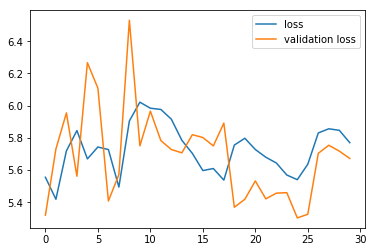

In [129]:
plt.plot(model1.history["loss"])
plt.plot(model1.history["val_loss"])

plt.legend(["loss", "validation loss"])
plt.show()

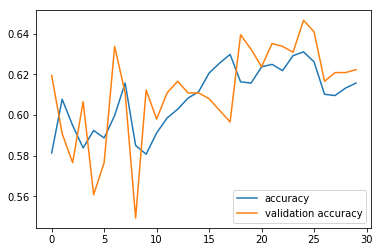

In [130]:
plt.plot(model1.history["accuracy"])
plt.plot(model1.history["val_accuracy"])

plt.legend(["accuracy", "validation accuracy"])
plt.show()